## Лабораторная работа №5. Решение задач классификации с помощью байесовского классификатора и метода k-ближайших соседей.
### Часть 2. Полиномиальный наивный байесовский классификатор.

Используемый набор данных: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin"
downloadFile(url + "/wdbc.data", "dataset/wdbc.data")
downloadFile(url + "/wdbc.names", "dataset/wdbc.names")

In [3]:
headers = ["ID", "Diagnosis", "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
           "Compactness Mean", "Concavity Mean", "Concave points Mean", "Symmetry Mean", "Fractal dimension Mean",
           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE",
           "Concave points SE", "Symmetry SE", "Fractal dimension SE", "Radius Worst", "Texture Worst", "Perimeter Worst",
           "Area Worst", "Smoothness Worst", "Compactness Worst", "Concavity Worst", "Concave points Worst",
           "Symmetry Worst", "Fractal dimension Worst"]  
data = pd.read_csv("dataset/wdbc.data", names=headers)
data = data.astype({"Diagnosis": "category"})
data.sample(40)

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
138,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.086240,0.1957,0.06216,1.2960,1.4520,8.419,101.900,0.010000,0.034800,0.065770,0.028010,0.051680,0.002887,18.550,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147
424,907145,B,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,0.07029,0.6965,1.7470,4.607,43.520,0.013070,0.018850,0.006021,0.010520,0.031000,0.004225,11.210,23.17,71.79,380.9,0.13980,0.13520,0.02085,0.04589,0.3196,0.08009
159,871149,B,10.900,12.96,68.69,366.8,0.07515,0.03718,0.003090,0.006588,0.1442,0.05743,0.2818,0.7614,1.808,18.540,0.006142,0.006134,0.001835,0.003576,0.016370,0.002665,12.360,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.940,0.018350,0.067600,0.092630,0.023080,0.023840,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
131,8670,M,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,0.4743,0.7859,3.094,48.310,0.006240,0.014840,0.028130,0.010930,0.013970,0.002461,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
478,911685,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.019690,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.041560,0.008038,0.018430,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
264,889719,M,17.190,22.07,111.60,928.3,0.09726,0.08995,0.090610,0.065270,0.1867,0.05580,0.4203,0.7383,2.819,45.420,0.004493,0.012060,0.020480,0.009875,0.011440,0.001575,21.580,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
219,88119002,M,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,0.7392,1.3210,4.722,109.900,0.005539,0.026440,0.026640,0.010780,0.013320,0.002256,27.900,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
134,867739,M,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,0.5959,1.2020,3.766,68.350,0.006001,0.014220,0.028550,0.009148,0.014920,0.002205,22.520,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610
27,852781,M,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,0.1697,0.05699,0.8529,1.8490,5.632,93.540,0.010750,0.027220,0.050810,0.019110,0.022930,0.004217,21.310,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421


In [4]:
display(data.describe())
display(data.isna().sum())

,ID,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


ID                         0
Diagnosis                  0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave points Mean        0
Symmetry Mean              0
Fractal dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave points SE          0
Symmetry SE                0
Fractal dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave points Worst       0
Symmetry Worst             0
Fractal dimension Worst    0
dtype: int64

Пропусков в данных нет.

Подготовим данные для классификации: выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
X = data.drop(columns=["ID", "Diagnosis"]).copy()
y = data["Diagnosis"].copy().cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

Создадим классификатор, обучим его, а затем выполним классификацию.

In [6]:
y_pred = MultinomialNB().fit(X_train, y_train).predict(X_test)

Оценим получившуюся классификацию.

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       0.94      0.78      0.85        41

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



In [8]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

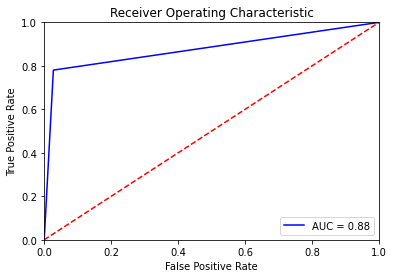

In [9]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()